# ECE 445 (ML for ENGG): Dec-12 In-Class Exercise

*Eric Jiang
ewj12 158002948*

12/12/2018

Step 1) Create three clusters of data {xi} i -> 1000 iid

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import rv_continuous
import numpy as np
from scipy.stats import multivariate_normal
import math
B= '\033[1m'
E= '\033[0m'

In [195]:
#set given values
u = np.asarray([[1, 0],[-1, 0],[0,-10]])

ui = 1/np.sqrt(2)
U = np.asarray([[ui, -ui], [ui, ui]])
lamb1 = np.asarray([[4,0],[0,1]])
lamb2 = np.asarray([[1,0],[0,5]])

sig1 = U@lamb1@U.T
sig2 = U@lamb2@U.T
sig3 = np.identity(2)
sigma = [[sig1],[sig2],[sig3]]

#create 3 clusters with GMM
cluster1 = multivariate_normal(u[0], sig1)
cluster2 = multivariate_normal(u[1], sig2)
cluster3 = multivariate_normal(u[2], sig3)

c1 = cluster1.rvs(1000).transpose()
c2 = cluster2.rvs(1000).transpose()
c3 = cluster3.rvs(1000).transpose()

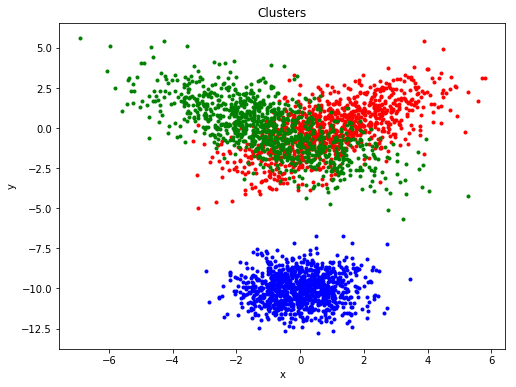

In [196]:
#Plot the 3 clusters
plt.figure(figsize=(8,6))

#j = 1 red; j = 2, green; j = 3 blue
plt.scatter(c1[0,:], c1[1,:], color='r', marker='.')
plt.scatter(c2[0,:], c2[1,:], color='g', marker='.')
plt.scatter(c3[0,:], c3[1,:], color='b', marker='.')

plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

K-means clustering

In [197]:
#Augment the clusters togethor along axis 1
clusters = np.concatenate((c1, c2, c3), axis = 1)

#randomly initialize the 3 clusters
c_init = np.random.randint(3, size = (3000,))

#Initialize loop with flag, repeats if c_init != cluster
flag = 1
while flag==1:
    #Reset flag to 0
    flag = 0

    #calculate the mean centroids per cluster around axis 1
    cent0 = np.mean(clusters[:,(c_init==0)], axis=1)
    cent1 = np.mean(clusters[:,(c_init==1)], axis=1)
    cent2 = np.mean(clusters[:,(c_init==2)], axis=1)

    #iterate through the clusters to find min distance
    iterate = 0
    for i in clusters.transpose():
        c_dis = np.argmin(np.array([np.linalg.norm(i-cent0), np.linalg.norm(i-cent1), np.linalg.norm(i-cent2)]))
        
        #If initial cluster converges to min centroid dis then break else continue with flag = 1
        if c_init[iterate] != c_dis:
            flag = 1
        
        #Set new cluster inits as min distance
        c_init[iterate] = c_dis
        iterate += 1
        

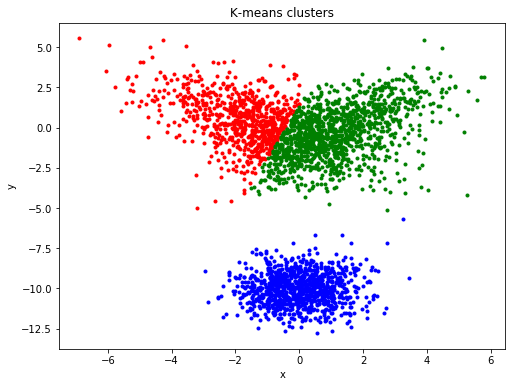

In [198]:
#Set clusters 1, 2, 3
c1 = clusters[:,(c_init==0)]
c2 = clusters[:,(c_init==1)]
c3 = clusters[:,(c_init==2)]

#Plotting the kmeans clusters
plt.figure(figsize=(8,6))
plt.scatter(c1[0], c1[1], color='r', marker='.')
plt.scatter(c2[0], c2[1], color='g', marker='.')
plt.scatter(c3[0], c3[1], color='b', marker='.')

plt.title('K-means clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()